In [1]:
import sys
sys.path.append('..')
import umbrella_mesh
import elastic_rods
import linkage_vis
from umbrella_mesh import UmbrellaEnergyType
from elastic_rods import EnergyType
from bending_validation import suppress_stdout as so

In [2]:
import numpy as np

In [3]:
input_path = '../../data/sphere_cap_0.3.json'
# input_path = '../../data/hemisphere.json'
from load_jsondata import read_data
input_data, io = read_data(filepath = input_path)
import mesh
target_mesh = mesh.Mesh(input_data['target_v'], input_data['target_f'])

### Initialization

In [4]:
curr_um = umbrella_mesh.UmbrellaMesh(io)
thickness = io.material_params[6]
curr_um.targetDeploymentHeight = thickness

In [5]:
curr_um.energy(UmbrellaEnergyType.Elastic)

7.54216878670477e-28

In [6]:
curr_um.set_design_parameter_config(True, False)

In [7]:
# curr_um.gradient(variableDesignParameters = True, designParameterOnly = False)

### Parameters

In [8]:
curr_um.uniformDeploymentEnergyWeight = 1e-3
curr_um.targetDeploymentHeight = thickness * 1

In [9]:
view = linkage_vis.LinkageViewer(curr_um, width=1024, height=600)
view.averagedMaterialFrames = True
view.show()

Renderer(camera=PerspectiveCamera(aspect=1.7066666666666668, children=(PointLight(color='#999999', position=(0…

### Gradient Validation

In [10]:
import umbrella_finite_diff

In [11]:
import importlib
importlib.reload(umbrella_finite_diff)

<module 'umbrella_finite_diff' from '/home/uday/UmbrellaMesh/python/tests/../umbrella_finite_diff.py'>

In [12]:
init_dof = curr_um.getExtendedDoFs()

In [13]:
perturbation = np.random.uniform(-1e-3, 1e-3, curr_um.numExtendedDoF())

In [14]:
curr_um.setExtendedDoFs(init_dof + perturbation)

In [15]:
view.update()

In [16]:
direction = np.random.uniform(-1e-3, 1e-3, curr_um.numExtendedDoFPARL())

In [17]:
curr_um.updateSourceFrame()

In [18]:
curr_um.uniformDeploymentEnergyWeight = 1e-3

In [19]:
curr_um.targetDeploymentHeight = thickness

In [20]:
curr_um.energy(umbrellaEnergyType=umbrella_mesh.UmbrellaEnergyType.Deployment)

0.001455662549139096

In [21]:
import numpy.linalg as la

In [22]:
la.norm(curr_um.gradientPerArmRestlen(umbrellaEnergyType=umbrella_mesh.UmbrellaEnergyType.Elastic))

175.6294827781377

In [23]:
curr_um.energy(umbrellaEnergyType=umbrella_mesh.UmbrellaEnergyType.Elastic)

1.3376780220123905

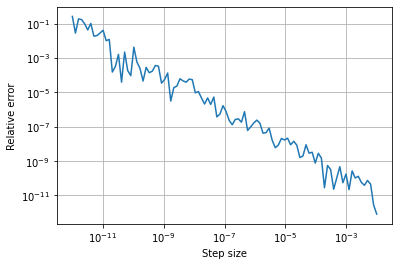

In [24]:
umbrella_finite_diff.gradient_convergence_plot(curr_um, umbrellaEnergyType=umbrella_mesh.UmbrellaEnergyType.Deployment, etype=elastic_rods.EnergyType.Full, direction = direction, variableDesignParameters=True, perArmRestLen=True)

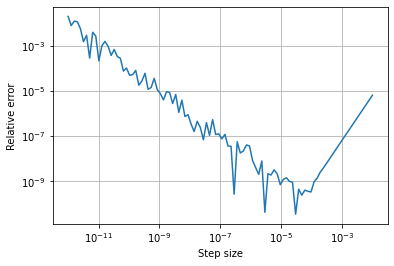

In [25]:
umbrella_finite_diff.gradient_convergence_plot(curr_um, umbrellaEnergyType=umbrella_mesh.UmbrellaEnergyType.Full, etype=elastic_rods.EnergyType.Full, direction = direction, variableDesignParameters=True, perArmRestLen=True)

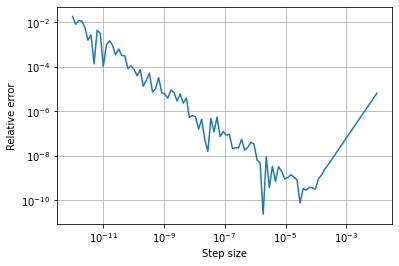

In [26]:
umbrella_finite_diff.gradient_convergence_plot(curr_um, umbrellaEnergyType=umbrella_mesh.UmbrellaEnergyType.Elastic, etype=elastic_rods.EnergyType.Full, direction = direction, variableDesignParameters=True, perArmRestLen=True)